In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# from protein_conformal.util import load_database, query

In [3]:
# Load in uniprot meta data
data_path = '/groups/doudna/projects/ronb/conformal_backup/protein-vec/src_run/data/uniprotkb_AND_reviewed_true_2023_07_03.tsv'
# '/data/ron/protein-vec/src_run/data/uniprotkb_AND_reviewed_true_2023_07_03.tsv'
meta_data_new = pd.read_csv(data_path, sep='\t')
#Now filter for the proteins that were newly discovered
new_proteins = meta_data_new[meta_data_new['Date of creation'] > '2022-05-25'].reset_index(drop=True)
new_proteins['length'] = new_proteins['Sequence'].str.len()
new_proteins = new_proteins[new_proteins['length'] <= 2000].reset_index(drop=True)

FileNotFoundError: [Errno 2] No such file or directory: '/groups/doudna/projects/ronb/conformal_backup/protein-vec/src_run/data/uniprotkb_AND_reviewed_true_2023_07_03.tsv'

In [10]:
max(new_proteins['Date of creation'])

'2023-06-28'

In [5]:
meta_data_new.shape

(569793, 16)

In [9]:
data_path = '/groups/doudna/projects/ronb/conformal_backup/protein-vec/src_run/protein_vec_embeddings/lookup_embeddings_meta_data.tsv'
lookup_proteins_meta = pd.read_csv(data_path, sep="\t")

In [8]:
# verify that none of the new proteins are in the lookup_proteins_meta
new_proteins['Entry'].isin(lookup_proteins_meta['Entry']).sum()

NameError: name 'lookup_proteins_meta' is not defined

In [5]:
lookup_embeddings = np.load('/data/ron/protein-vec/src_run/protein_vec_embeddings/lookup_embeddings.npy')

In [6]:
print(lookup_embeddings.shape, lookup_proteins_meta.shape)

(540560, 512) (540560, 17)


In [7]:
query_embeddings = np.load('/data/ron/protein-vec/src_run/new_protein_embeddings.npy')

In [8]:
# verify that the embeddings are the same size
print(query_embeddings.shape, new_proteins.shape)

(2295, 512) (2295, 17)


In [5]:
column = 'Pfam'

In [10]:
# select proteins and their embeddings only for proteins that have a Pfam domain for lookup_proteins_meta
col_proteins_meta = lookup_proteins_meta[~lookup_proteins_meta[column].isnull()]
col_embeddings = lookup_embeddings[col_proteins_meta.index]
# drop index to avoid confusion
col_proteins_meta = col_proteins_meta.reset_index(drop=True)

In [7]:
# filter out proteins that don't have a Pfam domain in the new_proteins
# new_proteins_meta = new_proteins[~new_proteins[column].isnull()]
# new_proteins_embeddings = query_embeddings[new_proteins_meta.index]
# drop index to avoid confusion
new_proteins_meta = new_proteins_meta.reset_index(drop=True)

NameError: name 'new_proteins_meta' is not defined

In [10]:
new_proteins_meta.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function),Gene Ontology (GO),EC number,Sequence,Date of creation,Gene3D,Pfam,length
0,A0A023I7E1,reviewed,ENG1_RHIMI,"Glucan endo-1,3-beta-D-glucosidase 1 (Endo-1,3...",ENG1 LAM81A,Rhizomucor miehei,796,cell wall organization [GO:0071555]; polysacch...,extracellular region [GO:0005576],"glucan endo-1,3-beta-D-glucosidase activity [G...",extracellular region [GO:0005576]; glucan endo...,3.2.1.39,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,2022-12-14,1.10.287.1170;1.20.5.420;,PF17652;PF03639;,796
1,A0A061AE05,reviewed,PAPSH_CAEEL,Bifunctional 3'-phosphoadenosine 5'-phosphosul...,pps-1 T14G10.1,Caenorhabditis elegans,654,3'-phosphoadenosine 5'-phosphosulfate biosynth...,nucleus [GO:0005634],adenylylsulfate kinase activity [GO:0004020]; ...,nucleus [GO:0005634]; adenylylsulfate kinase a...,2.7.1.25; 2.7.7.4,MLTPRDENNEGDAMPMLKKPRYSSLSGQSTNITYQEHTISREERAA...,2023-02-22,3.40.50.620;3.40.50.300;3.10.400.10;,PF01583;PF01747;PF14306;,654
2,A0A072VDF2,reviewed,CCR1_MEDTR,Cinnamoyl-CoA reductase 1 (Mt-CCR1) (EC 1.2.1....,CCR1 MTR_2g104960 MtrunA17_Chr2g0333781,Medicago truncatula (Barrel medic) (Medicago t...,342,lignin biosynthetic process [GO:0009809]; phen...,cytoplasm [GO:0005737],cinnamoyl-CoA reductase activity [GO:0016621];...,cytoplasm [GO:0005737]; cinnamoyl-CoA reductas...,1.2.1.-; 1.2.1.44,MPAATAAAAAESSSVSGETICVTGAGGFIASWMVKLLLEKGYTVRG...,2023-02-22,3.40.50.720;,PF01370;,342
3,A0A076FFM5,reviewed,F8H1_OCIBA,"Flavonoid 8-hydroxylase 1, chloroplastic (ObF8...",F8H-1,Ocimum basilicum (Sweet basil),523,flavonoid metabolic process [GO:0009812],chloroplast [GO:0009507]; chloroplast membrane...,"2 iron, 2 sulfur cluster binding [GO:0051537];...",chloroplast [GO:0009507]; chloroplast membrane...,1.14.15.-,MPFPMEVLQASSLSFPLLRRHSRNNLINKFRNPTLPRIDIPRQNID...,2022-12-14,2.102.10.10;,PF08417;PF00355;,523
4,A0A0B4U9L8,reviewed,VMF1_VIPAA,Zinc metalloproteinase-disintegrin-like protei...,NaN,Vipera ammodytes ammodytes (Western sand viper),614,envenomation resulting in modulation of blood ...,extracellular region [GO:0005576]; extraorgani...,metalloendopeptidase activity [GO:0004222]; me...,extracellular region [GO:0005576]; extraorgani...,3.4.24.-,MLQVLLVTICLAVFPYQGSSIILESGNVNDYEVVYPQKLTALLKGA...,2023-02-22,3.40.390.10;4.10.70.10;,PF08516;PF00200;PF01562;PF01421;,614


In [11]:
len(new_proteins_meta)

1864

In [6]:
after = new_proteins_meta['Date of creation'] > '2022-12-14'

NameError: name 'new_proteins_meta' is not defined

In [26]:
np.save(after, '/data/ron/protein-conformal/data/new_proteins_after_cutoff.npy')

0       False
1        True
2        True
3       False
4        True
        ...  
1859     True
1860    False
1861    False
1862    False
1863     True
Name: Date of creation, Length: 1864, dtype: bool

In [24]:
sum(new_proteins_meta['Date of creation'] > '2022-12-14')

870

In [65]:
# load database
lookup_database = load_database(col_embeddings)

# Query for the 1st nearest neighbor
k = col_embeddings.shape[0]
# 100000
D, I = query(lookup_database, new_proteins_embeddings, k)

## Check for exchangability

In [12]:
new_proteins_tmp = new_proteins.sort_values('Date of creation', ascending=False).reset_index(drop=True)

In [14]:
len(new_proteins_tmp)

2295

In [18]:
new_proteins_tmp.iloc[int(np.ceil(len(new_proteins_tmp)/2))]

Entry                                                                            Q6AYL0
Reviewed                                                                       reviewed
Entry Name                                                                      TPC_RAT
Protein names                         Mitochondrial thiamine pyrophosphate carrier (...
Gene Names                                                        Slc25a19 LOC100910173
Organism                                                        Rattus norvegicus (Rat)
Length                                                                              318
Gene Ontology (biological process)    thiamine pyrophosphate transmembrane transport...
Gene Ontology (cellular component)    mitochondrial membrane [GO:0031966]; mitochond...
Gene Ontology (molecular function)    antiporter activity [GO:0015297]; thiamine pyr...
Gene Ontology (GO)                    mitochondrial membrane [GO:0031966]; mitochond...
EC number                       

In [13]:
from matplotlib import rcParams


[Text(0.9996654, 0, '0.99967'),
 Text(0.99983096, 0, '0.99983'),
 Text(1.0000002, 0, '1.00000')]

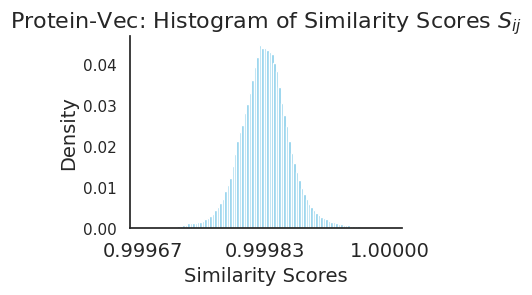

In [54]:
# Set the style of the visualization
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(3.5, 2.5))
# weights = np.ones_like(D.flatten())/float(len(D.flatten()))
# plt.hist(D.flatten(), bins=100, weights=weights)

# Set Canela Text font and font size
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Canela Text']
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 14

# Normalize the data for probability density
weights = np.ones_like(D.flatten()) / float(len(D.flatten()))

# # Create the histogram
# sns.histplot(D.flatten(), bins=100, kde=False, stat="density", weights=weights, color="skyblue", edgecolor='black', ax=ax)
# Create the histogram using Matplotlib
ax.hist(D.flatten(), bins=100, weights=weights, color="skyblue")

# Customize the plot
ax.set_xlabel('Similarity Scores', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_title(r'Protein-Vec: Histogram of Similarity Scores $S_{ij}$', fontsize=16)


# Remove the square grid and axes
sns.despine(left=False, bottom=False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Adding only three labels on the x-axis (min, mid, max)
min_sim = np.min(D)
mid_sim = np.median(D)
max_sim = np.max(D)
ax.set_xticks([min_sim, mid_sim, max_sim])
ax.set_xticklabels([f'{min_sim:.5f}', f'{mid_sim:.5f}', f'{max_sim:.5f}'], fontsize=14)

In [44]:
fig.savefig('/data/ron/protein-conformal/figs/protein_vec_histogram.svg', format='svg', dpi=300, bbox_inches='tight')

In [55]:
fig.savefig('/data/ron/protein-conformal/figs/protein_vec_histogram.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [56]:
col_meta_data = col_proteins_meta[column].values

In [66]:
near_ids = []
# for i in range(I.shape[0]):
for i in range(I.shape[0]):
    meta = col_meta_data[I[i]]
    meta_query = new_proteins_meta.iloc[i][column]
    # if no annotation for the query, skip
    
    if meta_query is np.nan:
        continue
    # create boolean mask for proteins that have the same annotation as the query
    # print(meta_query)

    # technically, this is a partial hit. to get exact hits, use the following line

    # mask_query_in_lookup = [meta_query in meta[k] for k in range(len(meta))]
    # kind of confusing. delineate the cases of different hits based on number of Pfam/EC/etc annotations

    mask_exact = [meta_query == meta[k] for k in range(len(meta))]
    # partial hits
    if meta_query.count(';') > 1:
        available_pfs = meta_query.split(';')
        mask_partial = [[available_pfs[j] in meta[k] for j in range(len(available_pfs) - 1)] for k in range(len(meta))]
    else:
        mask_partial = [meta_query in meta[k] for k in range(len(meta))]

    
    # available_pfs = meta_query.split(';')
    # mask_partial = [[available_pfs[j] in meta[k] for j in range(len(available_pfs) - 1)] for k in range(len(meta))]
    
    near_ids.append({
        'meta': meta,
        'meta_query': meta_query,
        'exact': mask_exact,
        'partial': mask_partial,
        'S_i': D[i]
    })   

In [67]:
# np.save('/data/ron/protein-conformal/data/pfam_new_proteins.npy', near_ids)

# save the results
np.save('/data/ron/protein-conformal/data/pfam_new_proteins_all.npy', near_ids)